In [1]:
import os 
import cv2
import numpy as np 
import pandas as pd 

from insightface.app import FaceAnalysis


In [2]:
#configure the face analysis model 
faceapp=FaceAnalysis(name='buffalo_l',root='insightface_models',providers=['CPUExecutionProvider'])
faceapp.prepare(ctx_id=0,det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_models\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_models\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_models\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_models\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_models\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


### Cleaning name in labels 

In [3]:
import re
def clean_name(string):
    #Allow only A-Z a-z
    string=re.sub(r'[^A-Za-z]',' ',string)
    string=string.title()
    return string

### Extract Facial Features and Labels


In [4]:
person_info=[]
listdir=os.listdir(path='images')
for folder_name in listdir:
    role,name=folder_name.split("-")
    role=clean_name(role)
    name=clean_name(name)
    
    
    img_files=os.listdir(path=f'images/{folder_name}')
    print(img_files)
    for file in img_files:
        path=f'./images/{folder_name}/{file}'
        print(path) 
        #Step-1 : Read the images 
        
        img_arr=cv2.imread(path)
        
        
        #Step-2: Get the info 
        result=faceapp.get(img_arr,max_num=1)
        
        
        if len(result)>0:
            #Step-3: Extract Facial Embeddings
            res=result[0]
            embeddings=res['embedding']
            
            #Step-4: Save all info name,role,embedding in a list
            
            person_info.append([name,role,embeddings])
            

['angelina-1.jpeg', 'angelina-10.jpeg', 'angelina-2.jpeg', 'angelina-3.jpeg', 'angelina-4.jpeg', 'angelina-5.jpeg', 'angelina-6.jpeg', 'angelina-7.jpeg', 'angelina-8.jpeg', 'angelina-9.jpeg']
./images/student-Angelina Jolie/angelina-1.jpeg


C:\Users\welcome\AppData\Local\Programs\Python\Python310\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


./images/student-Angelina Jolie/angelina-10.jpeg
./images/student-Angelina Jolie/angelina-2.jpeg
./images/student-Angelina Jolie/angelina-3.jpeg
./images/student-Angelina Jolie/angelina-4.jpeg
./images/student-Angelina Jolie/angelina-5.jpeg
./images/student-Angelina Jolie/angelina-6.jpeg
./images/student-Angelina Jolie/angelina-7.jpeg
./images/student-Angelina Jolie/angelina-8.jpeg
./images/student-Angelina Jolie/angelina-9.jpeg
['evans_1.jpeg', 'evans_10.jpeg', 'evans_2.jpeg', 'evans_3.jpeg', 'evans_4.jpeg', 'evans_5.jpeg', 'evans_6.jpeg', 'evans_7.jpeg', 'evans_8.jpeg', 'evans_9.jpeg']
./images/student-Chris_Evans/evans_1.jpeg
./images/student-Chris_Evans/evans_10.jpeg
./images/student-Chris_Evans/evans_2.jpeg
./images/student-Chris_Evans/evans_3.jpeg
./images/student-Chris_Evans/evans_4.jpeg
./images/student-Chris_Evans/evans_5.jpeg
./images/student-Chris_Evans/evans_6.jpeg
./images/student-Chris_Evans/evans_7.jpeg
./images/student-Chris_Evans/evans_8.jpeg
./images/student-Chris_Eva

In [5]:
dataframe=pd.DataFrame(person_info,columns=['Name','Role','Facial Features'])
dataframe

,Name,Role,Facial Features
0,Angelina Jolie,Student,"[0.07833834, 1.9013327, -0.023104727, -0.93364..."
1,Angelina Jolie,Student,"[0.23105249, 0.97989666, -0.72453463, -0.32067..."
2,Angelina Jolie,Student,"[0.07103534, 2.1639593, -0.34098405, -0.747323..."
3,Angelina Jolie,Student,"[0.4856732, 2.1133401, 0.44498783, -0.6644518,..."
4,Angelina Jolie,Student,"[-0.08826853, 1.5147394, -0.18697354, -1.34346..."
5,Angelina Jolie,Student,"[-0.54606247, 1.531727, -0.12911654, -1.151377..."
6,Angelina Jolie,Student,"[0.9439992, 1.6276022, -0.25298497, -1.4116743..."
7,Angelina Jolie,Student,"[0.4234296, 0.33478338, 0.119848564, 0.0765088..."
8,Angelina Jolie,Student,"[-0.3638594, 1.3714143, 0.06764521, -0.8577406..."
9,Angelina Jolie,Student,"[0.75214535, 1.209832, 0.043729156, -1.4504919..."


In [6]:
#Read Test Images
img_test=cv2.imread('testimages/testing_image.jpg')
cv2.imshow('Testing Image',img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#Extract Features
res_test=faceapp.get(img_test,max_num=0)

C:\Users\welcome\AppData\Local\Programs\Python\Python310\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [8]:
res_test


[{'bbox': array([170.63806, 144.23833, 624.1547 , 735.3005 ], dtype=float32),
  'kps': array([[322.78918, 394.24173],
         [507.71683, 340.12637],
         [480.70175, 456.98764],
         [415.98557, 608.7477 ],
         [565.0564 , 561.7885 ]], dtype=float32),
  'det_score': 0.8543685,
  'landmark_3d_68': array([[ 1.43573822e+02,  4.65944305e+02,  2.42225250e+02],
         [ 1.72914825e+02,  5.25117676e+02,  2.32408142e+02],
         [ 2.04893265e+02,  5.84903259e+02,  2.17452438e+02],
         [ 2.40247620e+02,  6.39947510e+02,  1.93650833e+02],
         [ 2.85939392e+02,  6.85316101e+02,  1.48006195e+02],
         [ 3.36640930e+02,  7.13786865e+02,  1.12073479e+02],
         [ 3.88816406e+02,  7.29717346e+02,  8.48446045e+01],
         [ 4.49848663e+02,  7.34215820e+02,  4.96997490e+01],
         [ 5.30813293e+02,  7.29723328e+02,  4.72890053e+01],
         [ 5.85856018e+02,  6.98243652e+02,  9.59538879e+01],
         [ 6.08902527e+02,  6.63473816e+02,  1.62245468e+02],
       

In [9]:
#Extract Features
res_test=faceapp.get(img_test,max_num=0)
for i,rt in enumerate(res_test):
    print('current loop: ',i)
    bbox=rt['bbox'].astype(int)
    score=int(rt['det_score']*100)
    embed_test=rt['embedding']
    

current loop:  0


In [10]:
len(embed_test)

512

In [11]:
X_list=dataframe['Facial Features'].tolist()
X=np.asarray(X_list)

In [12]:
X

array([[ 0.07833834,  1.9013327 , -0.02310473, ...,  0.276837  ,
         0.9616718 ,  0.96258956],
       [ 0.23105249,  0.97989666, -0.72453463, ..., -0.55895305,
        -0.28967464,  0.44119906],
       [ 0.07103534,  2.1639593 , -0.34098405, ..., -0.27777192,
         1.2064482 ,  0.99274856],
       ...,
       [ 0.3362017 ,  1.0788487 ,  0.17650224, ...,  0.59941214,
        -0.18309468, -0.17102736],
       [ 0.7567495 ,  0.5651346 ,  0.3000068 , ...,  0.9316439 ,
         0.12958571, -0.8079842 ],
       [ 0.9531727 ,  1.0514251 ,  1.0731356 , ...,  1.1881769 ,
         1.3087766 , -0.33017445]], dtype=float32)

In [13]:
X.shape

(50, 512)

In [14]:
from sklearn.metrics import pairwise

In [15]:
y=embed_test.reshape(1,512)

In [16]:
euclidean_distance=pairwise.euclidean_distances(X,y)
manhattan_distance=pairwise.manhattan_distances(X,y)
cosine_similarity=pairwise.cosine_similarity(X,y)

In [17]:
data_search=dataframe.copy()
data_search['euclidean']=euclidean_distance 
data_search['manhattan']=manhattan_distance
data_search['cosine']=cosine_similarity

In [18]:
data_search

,Name,Role,Facial Features,euclidean,manhattan,cosine
0,Angelina Jolie,Student,"[0.07833834, 1.9013327, -0.023104727, -0.93364...",28.766346,522.587866,-0.007811
1,Angelina Jolie,Student,"[0.23105249, 0.97989666, -0.72453463, -0.32067...",28.771410,526.201838,-0.000222
2,Angelina Jolie,Student,"[0.07103534, 2.1639593, -0.34098405, -0.747323...",27.810486,508.312101,0.006581
3,Angelina Jolie,Student,"[0.4856732, 2.1133401, 0.44498783, -0.6644518,...",28.263550,518.484426,0.016519
4,Angelina Jolie,Student,"[-0.08826853, 1.5147394, -0.18697354, -1.34346...",27.760801,505.231017,0.009730
5,Angelina Jolie,Student,"[-0.54606247, 1.531727, -0.12911654, -1.151377...",28.333183,513.886182,-0.011227
6,Angelina Jolie,Student,"[0.9439992, 1.6276022, -0.25298497, -1.4116743...",29.992252,546.580536,-0.025464
7,Angelina Jolie,Student,"[0.4234296, 0.33478338, 0.119848564, 0.0765088...",29.061913,525.856131,-0.040998
8,Angelina Jolie,Student,"[-0.3638594, 1.3714143, 0.06764521, -0.8577406...",28.508583,528.220374,0.005199
9,Angelina Jolie,Student,"[0.75214535, 1.209832, 0.043729156, -1.4504919...",29.868986,545.772209,-0.008855


In [19]:
import matplotlib.pyplot as plt 

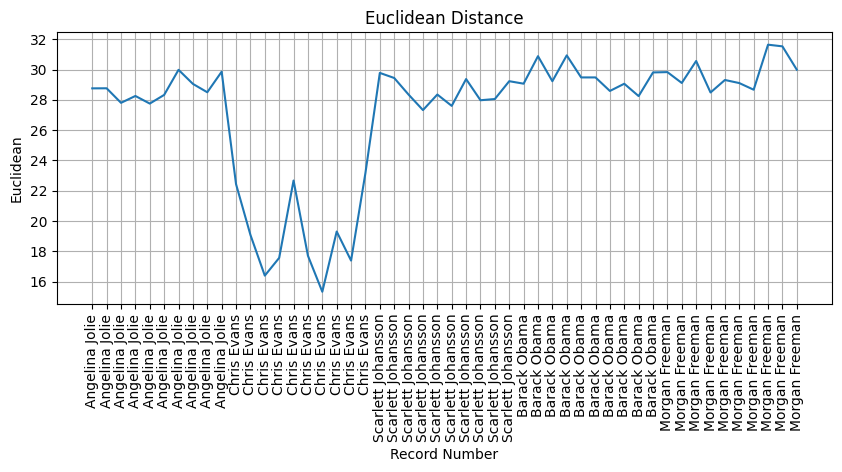

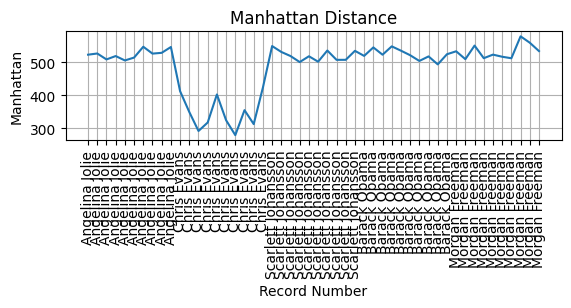

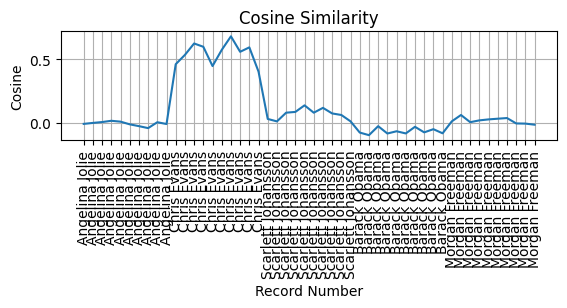

In [20]:
plt.figure(figsize=(10,12)) 
plt.subplot(3,1,1)
plt.plot(data_search['euclidean'],)
plt.xticks(ticks=list(range(len(data_search['euclidean']))),labels=data_search['Name'],rotation=90)
plt.xlabel('Record Number')
plt.ylabel('Euclidean')
plt.title("Euclidean Distance")
plt.grid()
plt.show()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'],)
plt.xticks(ticks=list(range(len(data_search['manhattan']))),labels=data_search['Name'],rotation=90)
plt.xlabel('Record Number')
plt.ylabel('Manhattan')
plt.title("Manhattan Distance")
plt.grid()
plt.show()

plt.subplot(3,1,3)
plt.plot(data_search['cosine'],)
plt.xticks(ticks=list(range(len(data_search['cosine']))),labels=data_search['Name'],rotation=90)
plt.xlabel('Record Number')
plt.ylabel('Cosine')
plt.title("Cosine Similarity")
plt.grid()
plt.show()

In [21]:
d_eq_optimal=25

In [22]:
data_search

,Name,Role,Facial Features,euclidean,manhattan,cosine
0,Angelina Jolie,Student,"[0.07833834, 1.9013327, -0.023104727, -0.93364...",28.766346,522.587866,-0.007811
1,Angelina Jolie,Student,"[0.23105249, 0.97989666, -0.72453463, -0.32067...",28.771410,526.201838,-0.000222
2,Angelina Jolie,Student,"[0.07103534, 2.1639593, -0.34098405, -0.747323...",27.810486,508.312101,0.006581
3,Angelina Jolie,Student,"[0.4856732, 2.1133401, 0.44498783, -0.6644518,...",28.263550,518.484426,0.016519
4,Angelina Jolie,Student,"[-0.08826853, 1.5147394, -0.18697354, -1.34346...",27.760801,505.231017,0.009730
5,Angelina Jolie,Student,"[-0.54606247, 1.531727, -0.12911654, -1.151377...",28.333183,513.886182,-0.011227
6,Angelina Jolie,Student,"[0.9439992, 1.6276022, -0.25298497, -1.4116743...",29.992252,546.580536,-0.025464
7,Angelina Jolie,Student,"[0.4234296, 0.33478338, 0.119848564, 0.0765088...",29.061913,525.856131,-0.040998
8,Angelina Jolie,Student,"[-0.3638594, 1.3714143, 0.06764521, -0.8577406...",28.508583,528.220374,0.005199
9,Angelina Jolie,Student,"[0.75214535, 1.209832, 0.043729156, -1.4504919...",29.868986,545.772209,-0.008855


In [23]:
datafilter=data_search.query(f'euclidean < {d_eq_optimal}')

In [24]:
datafilter.reset_index(drop=True,inplace=True)
datafilter

,Name,Role,Facial Features,euclidean,manhattan,cosine
0,Chris Evans,Student,"[0.17511636, -0.48413593, 0.17106508, -0.75502...",22.436947,412.366018,0.460252
1,Chris Evans,Student,"[0.5489886, -0.48457748, -0.03152761, -0.79487...",19.083944,349.544750,0.533447
2,Chris Evans,Student,"[0.105473325, -0.16512832, -0.23155138, 0.2726...",16.389723,292.290563,0.622852
3,Chris Evans,Student,"[0.6807161, -1.1776241, 0.34937266, 0.24574593...",17.562668,317.915943,0.596929
4,Chris Evans,Student,"[0.36514536, 0.47266597, 0.060292497, 0.672604...",22.675398,402.544818,0.445794
5,Chris Evans,Student,"[0.5351338, -0.30261585, -0.54563975, 0.207050...",17.705414,324.707151,0.572395
6,Chris Evans,Student,"[0.3315165, -0.762088, 1.0445695, 0.40931317, ...",15.324595,279.681072,0.678899
7,Chris Evans,Student,"[-0.0727373, -0.5730324, 0.19899955, 0.4785388...",19.304436,355.153807,0.557639
8,Chris Evans,Student,"[0.53841084, -0.40246361, 0.26838827, -1.25513...",17.384001,313.021230,0.592341
9,Chris Evans,Student,"[0.35970697, -0.27062926, -0.88524216, -1.0250...",23.180704,423.525326,0.401817


In [25]:
if len(datafilter)>0:
    argmin=datafilter['euclidean'].argmin()
    name_ed,role_ed=datafilter.loc[argmin][['Name','Role']]
else:
    name_ed="Unknown"
    role_ed="Unknown"

In [26]:
print(name_ed," ",role_ed)

Chris Evans   Student


### Identify the distance using Manhattan Distance

In [27]:
d_manhattan_optimal=450

In [28]:
datafilter=data_search.query(f'manhattan < {d_manhattan_optimal}') 
datafilter.reset_index(drop=True,inplace=True) 
if len(datafilter)>0:
    argmin=datafilter['manhattan'].argmin()
    name_md,role_md=datafilter.loc[argmin][['Name','Role']]
else:
    name_md="Unknown"
    role_md="Unknown"

In [29]:
print(name_md,role_md)

Chris Evans Student


### Identify the distance using cosine similarity

In [30]:
S_opt=0.4
datafilter=data_search.query(f'cosine > {S_opt}') 
datafilter.reset_index(drop=True,inplace=True)  

if len(datafilter)>0:
    argmax=datafilter['cosine'].argmax()
    name_cos,role_cos=datafilter.loc[argmax][['Name','Role']]
    
else:
    name_cos="Unknown"
    role_cos="Unknown"


In [31]:
name_cos

'Chris Evans'

In [32]:
role_cos

'Student'

In [33]:
#Step 1: Take the dataframe 
#Step 2: Index face embedding from the features and convert into array
#Step 3: Calculate cosine similarity 
#Step 4: Filter the data 
#Step 5: Get the person name

### Identify Multiple Persons in an image

In [83]:
def ml_search_algorithm(dataframe,feature_column,test_vector,name_role=['Name','Role'],thresh=0.5):
    
    
    
    dataframe=dataframe.copy()
    
    
    X_list=dataframe[feature_column].tolist()
    x=np.asarray(X_list)
    
    
    similar=pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr=np.array(similar).flatten()
    dataframe['cosine']=similar_arr
    
    
    data_filter=dataframe.query(f'cosine >= {thresh}')
    if(len(data_filter)>0):
        data_filter.reset_index(drop=True,inplace=True)
        argmax=data_filter['cosine'].argmax()
        person_name,person_role=data_filter.loc[argmax][name_role]
        
    else:
        person_name='Unknown'
        person_role='Unknown'
    
    
    return person_name,person_role
    

In [103]:
testingtheimage=cv2.imread('testimages/avengers.jpg')
cv2.imshow('test image',testingtheimage)
cv2.waitKey()
cv2.destroyAllWindows()

In [104]:
results=faceapp.get(testingtheimage)
test_copy=testingtheimage.copy()


C:\Users\welcome\AppData\Local\Programs\Python\Python310\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [105]:
results

[{'bbox': array([ 754.8257 ,   92.29477, 1158.7911 ,  653.43823], dtype=float32),
  'kps': array([[ 862.6471 ,  315.0252 ],
         [1049.4598 ,  297.02826],
         [ 966.41626,  426.9774 ],
         [ 879.8887 ,  492.7373 ],
         [1065.0527 ,  474.8053 ]], dtype=float32),
  'det_score': 0.9070964,
  'landmark_3d_68': array([[ 7.4944067e+02,  3.1051361e+02,  2.8162860e+02],
         [ 7.6427332e+02,  3.6779434e+02,  2.7867896e+02],
         [ 7.7863501e+02,  4.2638367e+02,  2.7074075e+02],
         [ 7.9667169e+02,  4.8179376e+02,  2.5291457e+02],
         [ 8.2043170e+02,  5.3258734e+02,  2.1266473e+02],
         [ 8.5148523e+02,  5.7084363e+02,  1.7768407e+02],
         [ 8.8494794e+02,  6.0196564e+02,  1.4661763e+02],
         [ 9.2534821e+02,  6.3109882e+02,  1.0783530e+02],
         [ 9.8948389e+02,  6.4967548e+02,  8.4102921e+01],
         [ 1.0522002e+03,  6.1999841e+02,  1.0143309e+02],
         [ 1.0942372e+03,  5.7640918e+02,  1.4244049e+02],
         [ 1.1257878e+03, 

In [113]:
for res in results:
    x1,y1,x2,y2=res['bbox'].astype(int)
    embeddings=res['embedding']
    person_name,person_role=ml_search_algorithm(dataframe_compress,'Facial Features',test_vector=embeddings,name_role=['Name','Role'],thresh=0.5) 
    
    
    
    if person_name == 'Unknown':
        color=(0,0,255)
        
    else:
        color=(0,255,0)
    
    
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    
    
    text_gen=person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,1)
    

    

cv2.imshow('test image',test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

    

In [108]:
dataframe

,Name,Role,Facial Features
0,Angelina Jolie,Student,"[0.07833834, 1.9013327, -0.023104727, -0.93364..."
1,Angelina Jolie,Student,"[0.23105249, 0.97989666, -0.72453463, -0.32067..."
2,Angelina Jolie,Student,"[0.07103534, 2.1639593, -0.34098405, -0.747323..."
3,Angelina Jolie,Student,"[0.4856732, 2.1133401, 0.44498783, -0.6644518,..."
4,Angelina Jolie,Student,"[-0.08826853, 1.5147394, -0.18697354, -1.34346..."
5,Angelina Jolie,Student,"[-0.54606247, 1.531727, -0.12911654, -1.151377..."
6,Angelina Jolie,Student,"[0.9439992, 1.6276022, -0.25298497, -1.4116743..."
7,Angelina Jolie,Student,"[0.4234296, 0.33478338, 0.119848564, 0.0765088..."
8,Angelina Jolie,Student,"[-0.3638594, 1.3714143, 0.06764521, -0.8577406..."
9,Angelina Jolie,Student,"[0.75214535, 1.209832, 0.043729156, -1.4504919..."


In [110]:
#Compressing 
dataframe_compress=dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)

In [111]:
dataframe_compress

,Name,Role,Facial Features
0,Angelina Jolie,Student,"[0.1987483, 1.4748628, -0.09814876, -0.8804337..."
1,Barack Obama,Teacher,"[-0.22192378, 1.5761815, -0.5031222, 0.1360412..."
2,Chris Evans,Student,"[0.35674706, -0.41496292, 0.039872665, -0.1544..."
3,Morgan Freeman,Teacher,"[0.7627855, 0.8906721, 0.46884507, 0.25902992,..."
4,Scarlett Johansson,Student,"[-0.13563304, -0.28201127, -0.4271903, -0.2822..."


In [114]:
#Convert dataframe into array and save in numpy zip format 
xvalues=dataframe_compress.values

In [115]:
xvalues

array([['Angelina Jolie', 'Student',
        array([ 1.98748305e-01,  1.47486281e+00, -9.81487632e-02, -8.80433679e-01,
               -4.95913208e-01,  6.36685610e-01,  7.20437050e-01,  4.32217658e-01,
               -1.01355433e+00, -2.19099611e-01, -1.25162935e+00,  6.21991139e-03,
               -1.08987772e+00, -9.10613060e-01,  9.80052352e-01, -8.08841527e-01,
               -3.21958333e-01, -3.24594975e-01, -1.63132936e-01, -2.94654667e-01,
                6.83650613e-01,  3.98857713e-01, -3.36551249e-01, -3.36880744e-01,
               -1.28378794e-01,  1.73572212e-01,  5.91753364e-01, -6.08514190e-01,
                1.05123878e+00,  7.50698745e-01,  5.75472936e-02, -4.44831669e-01,
                7.35051513e-01, -1.39626372e+00,  5.44246078e-01,  1.25618792e+00,
                1.07382022e-01, -3.43393534e-01, -1.06192574e-01,  1.95723116e+00,
                6.32386267e-01,  5.08046746e-01,  5.25688350e-01, -2.17110906e-02,
               -8.33714366e-01, -5.26804216e-02, -

In [119]:
col_name=np.array(dataframe_compress.columns)

In [120]:
col_name

array(['Name', 'Role', 'Facial Features'], dtype=object)

In [121]:
np.savez('dataframe_students_teachers.npz',xvalues,col_name)

In [127]:
file_np=np.load('dataframe_students_teachers.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [128]:
file_np['arr_0']

array([['Angelina Jolie', 'Student',
        array([ 1.98748305e-01,  1.47486281e+00, -9.81487632e-02, -8.80433679e-01,
               -4.95913208e-01,  6.36685610e-01,  7.20437050e-01,  4.32217658e-01,
               -1.01355433e+00, -2.19099611e-01, -1.25162935e+00,  6.21991139e-03,
               -1.08987772e+00, -9.10613060e-01,  9.80052352e-01, -8.08841527e-01,
               -3.21958333e-01, -3.24594975e-01, -1.63132936e-01, -2.94654667e-01,
                6.83650613e-01,  3.98857713e-01, -3.36551249e-01, -3.36880744e-01,
               -1.28378794e-01,  1.73572212e-01,  5.91753364e-01, -6.08514190e-01,
                1.05123878e+00,  7.50698745e-01,  5.75472936e-02, -4.44831669e-01,
                7.35051513e-01, -1.39626372e+00,  5.44246078e-01,  1.25618792e+00,
                1.07382022e-01, -3.43393534e-01, -1.06192574e-01,  1.95723116e+00,
                6.32386267e-01,  5.08046746e-01,  5.25688350e-01, -2.17110906e-02,
               -8.33714366e-01, -5.26804216e-02, -